In [ ]:
pip install tweepy

In [ ]:
pip install gspread

In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.1 MB 8.0 MB/s 
     |████████████████████████████████| 160 kB 54.7 MB/s 
     |████████████████████████████████| 192 kB 70.8 MB/s 
     |████████████████████████████████| 271 kB 56.7 MB/s 


In [ ]:
pip install alpha_vantage pandas

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
pip install df2gspread

     |████████████████████████████████| 56 kB 2.3 MB/s 
  Created wheel for df2gspread: filename=df2gspread-1.0.4-py3-none-any.whl size=11952 sha256=3c00e8f21c017ac9931aef049cc03a6da677a3556062247205594876a844c709
  Stored in directory: /root/.cache/pip/wheels/4d/78/20/cf9a2810f93885ad71bd351c8b604455ba160ac4b0e9b7d526
Successfully built df2gspread
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 4.4.0 requires google-api-python-client>=1.7.8, but you have google-api-python-client 1.6.7 which is incompatible.
earthengine-api 0.1.290 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.6.7 whi

In [ ]:
import json
import csv
import tweepy
import re
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt



In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g

In [ ]:
scope = ['https://spreadsheets.google.com/feeds',
 'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name(
 'myfile.json', scopes=scope)
gc = gspread.authorize(credentials)
spreadsheet_key='1cLkhGp8bbwBGzLt5x51SxQhAfc_s9HNzheweOjz5TAY'
                  

FileNotFoundError: ignored

In [ ]:
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    #create an authorization for accessing Twitter (aka tell the program we have permission to do what we're doing)
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    
    #make the name of the spreadsheet we will write to
    #it will be named whatever we search
    fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

    #open the spreadsheet we will write to
    with open('%s.csv' % (fname), 'w', encoding='utf-8') as file:

        w = csv.writer(file)

        #write header row to spreadsheet
        w.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'followers_count'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        #max we can pull is 500,000 tweets a month; I have it set to 100
        for tweet in tweepy.Cursor(api.search_tweets, q=hashtag_phrase+' -filter:retweets', \
                                   lang="en", tweet_mode='extended').items(500):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), [e['text'] for e in tweet._json['entities']['hashtags']], tweet.user.followers_count])

#this creates input boxes where you will input your keys given to you by twitter
consumer_key = "mSkxrXIQ518i4vp1uFOhs5x5B"
consumer_secret = "dl2rgfOJ5GSda986YRb2G7DZowoZ1gOsngF4o0Tjyh5JQK3Wqk"
access_token = "1121504781309071360-i8aQst3qQGxZxxRYb6nWCfOmuSSQqP"
access_token_secret = "ELXtJnx8LoKXCqBQw31rIqU9ExdHUlkbM9c9kmK6pnT80"

hashtag_phrase = "#MATIC"
#hashtag_phrase = input('Hashtag Phrase ') #you'll enter your search terms in the form "#xyz" ; use logical operators AND/OR

if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

In [ ]:
#sentiment analysis
data = pd.read_csv('MATIC.csv',
                   encoding='ISO 8859-1', error_bad_lines=False)

data=pd.DataFrame(data)

print (data[:10])

                   timestamp  \
0  2021-12-06 13:34:01+00:00   
1  2021-12-06 13:33:08+00:00   
2  2021-12-06 13:33:06+00:00   
3  2021-12-06 13:32:37+00:00   
4  2021-12-06 13:32:26+00:00   
5  2021-12-06 13:31:49+00:00   
6  2021-12-06 13:31:23+00:00   
7  2021-12-06 13:31:23+00:00   
8  2021-12-06 13:30:53+00:00   
9  2021-12-06 13:30:48+00:00   

                                          tweet_text            username  \
0  b'The Polygon chain is the new frontier.  Meet...  b'PancakeBunnyFin'   
1  b'@airdropinspect Very good project @jook9009 ...    b'sayed79653911'   
2  b'\xf0\x9f\x94\xa5"One of the primary tactics ...  b'berlin_samurai2'   
3  b'"One way to keep momentum going is to have c...  b'berlin_samurai2'   
4  b'"Only I can change my life. No one can do it...  b'berlin_samurai2'   
5  b'"Optimism is the one quality associated with...  b'berlin_samurai2'   
6  b"@SheeshaFinance_ @StarterXyz It's really nic...       b'BijoyHa111'   
7  b'\xe2\x9c\x92Outstanding people hav

In [ ]:
#select comment and listing_id columns.
tweet_data = data["tweet_text"]
print (tweet_data[:50])



0     b'The Polygon chain is the new frontier.  Meet...
1     b'@airdropinspect Very good project @jook9009 ...
2     b'\xf0\x9f\x94\xa5"One of the primary tactics ...
3     b'"One way to keep momentum going is to have c...
4     b'"Only I can change my life. No one can do it...
5     b'"Optimism is the one quality associated with...
6     b"@SheeshaFinance_ @StarterXyz It's really nic...
7     b'\xe2\x9c\x92Outstanding people have one thin...
8     b'If you want to trade cryptocurrency convenie...
9     b'@airdropinspect Good project for New Members...
10    b'@airdropinspect Great project for crypto ass...
11    b'5.28% profit of $MATIC-USD: My target is to ...
12    b'https://t.co/d7ee6TrnkX \xf0\x9f\x91\x8d Dom...
13    b'STAY AWAY FROM #CRYPTO What the public now s...
14    b'\xf0\x9f\x91\x8b  #NFTFriends! This pumpkin ...
15    b'If crypto was an ice cream this morning woul...
16    b'The move this week is #lrc #CRO #MATIC for s...
17    b'@airdropinspect This is a mega project e

In [ ]:
#remove other non-words and characters
def clean(string):
    string = re.sub('<br/>', '', string)
    string = re.sub('&quot', '', string)
    string = re.sub('&amp', '', string)
    string = re.sub('\"', '', string)
    string = re.sub('https?\?S+', '', string)
    string = re.sub('\S+@\S+', '', string)
    string = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', string)
    string = re.sub('&\w+;', '', string)
    string = re.sub('\d+', '',string)
    string = re.sub('\b\w{1,2}\b', '', string)
    string = re.sub("b'", '', string)
    string = re.sub("'", '', string)
    string = re.sub("x*", '', string)
    string = re.sub("\\\\", '', string)
    #remove tabs, new lines, white spaces and replace those with sing spaces
    string = re.sub('\s+',' ',string)
    return string
#excute the above define function.
tweet_data = tweet_data.apply(clean)
print (tweet_data[20:50])

20     Fantastic project with great potential. The t...
21    Attention matic holders!! The polygon mainnet ...
22     good project, hopefully in the future it can ...
23     I believe this is a faithful project.The proj...
24    b#Ethereum UPDATE!a Looking to break the desce...
25    Top PERFORMING cryptocurrency this hour . $ETH...
26    Get crypto-taation done right! Automated trans...
27    #MATIC Matic is aimming for ., moving in the r...
28     @StarterXyz Wow sir This is very strong proje...
29     @SheeshaFinance_ Wow sir This is very strong ...
30    #OpenSeaNFT #nftcollector #NFTartist #NFTGem #...
31     @StarterXyz Wow sir This is very strong proje...
32     same bullish af with #EverRiseV #MATIC #ETH #...
33    Do you have crypto tas to calculate? We at #Ca...
34    b#Bitcoin UPDATE! As we can see, we are still ...
35     #matic and #hero are in the radar. What do yo...
36    #Matic is about to announce something Big #Eth...
37    DELEGATE_DONT_HATE has just sent its voter

In [ ]:
#sentiment/polarity & subjectivity using VADER.

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    return analyser.polarity_scores(sentence)

In [ ]:
#pass through the data.
tweet_data['vader_polarity'] = tweet_data.apply(sentiment_analyzer_scores)
print (tweet_data[:10])

0    The Polygon chain is the new frontier. Meet us...
1     Very good project @jook @mekh @Aya @hoor_elga...
2    aOne of the primary tactics for enduring winni...
3    One way to keep momentum going is to have cons...
4    Only I can change my life. No one can do it fo...
5    Optimism is the one quality associated with su...
6     @StarterXyz Its really nice project and very ...
7    cOutstanding people have one thing in common: ...
8    If you want to trade cryptocurrency convenient...
9     Good project for New Members its looking for ...
Name: tweet_text, dtype: object


In [ ]:
#call out each key as a separate column.
tweet_data['compound']  = tweet_data['vader_polarity'].apply(lambda score_dict: score_dict['compound'])
tweet_data['neg']  = tweet_data['vader_polarity'].apply(lambda score_dict: score_dict['neg'])
tweet_data['neu']  = tweet_data['vader_polarity'].apply(lambda score_dict: score_dict['neu'])
tweet_data['pos']  = tweet_data['vader_polarity'].apply(lambda score_dict: score_dict['pos'])
print (tweet_data['pos'][:5],tweet_data['neu'][:5],tweet_data['neg'][:5],tweet_data['compound'][:5])

0    0.070
1    0.166
2    0.129
3    0.137
4    0.000
Name: tweet_text, dtype: float64 0    0.930
1    0.834
2    0.871
3    0.863
4    0.937
Name: tweet_text, dtype: float64 0    0.000
1    0.000
2    0.000
3    0.000
4    0.062
Name: tweet_text, dtype: float64 0    0.5106
1    0.4927
2    0.5267
3    0.6597
4   -0.2960
Name: tweet_text, dtype: float64


In [ ]:
data_final=pd.DataFrame(tweet_data)
print (data_final.shape)
data_final['pos']=tweet_data['pos']
data_final['neu']=tweet_data['neu']
data_final['neg']=tweet_data['neg']
data_final['compound']=tweet_data['compound']

print (data_final.shape)
print (data_final[:50])

(505, 1)
(505, 5)
                                           tweet_text    pos    neu    neg  \
0   The Polygon chain is the new frontier. Meet us...  0.070  0.930  0.000   
1    Very good project @jook @mekh @Aya @hoor_elga...  0.166  0.834  0.000   
2   aOne of the primary tactics for enduring winni...  0.129  0.871  0.000   
3   One way to keep momentum going is to have cons...  0.137  0.863  0.000   
4   Only I can change my life. No one can do it fo...  0.000  0.937  0.062   
5   Optimism is the one quality associated with su...  0.265  0.735  0.000   
6    @StarterXyz Its really nice project and very ...  0.371  0.629  0.000   
7   cOutstanding people have one thing in common: ...  0.000  1.000  0.000   
8   If you want to trade cryptocurrency convenient...  0.035  0.965  0.000   
9    Good project for New Members its looking for ...  0.225  0.775  0.000   
10   Great project for crypto assets and I really ...  0.405  0.562  0.033   
11  .% profit of $MATIC-USD: My target is to b

In [ ]:
#visualize sentiment

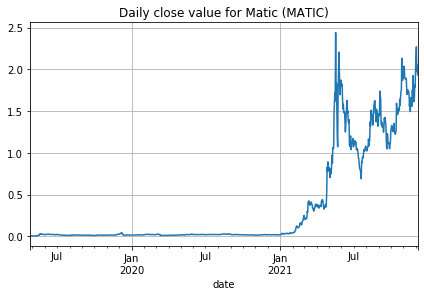

In [ ]:
#price
cc = CryptoCurrencies(key='6C3I4PGVGFIK0B2K', output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='MATIC', market='USD')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for Matic (MATIC)')
plt.grid()
plt.show()

In [ ]:
wks_name= "Sheet1"
d2g.upload(data_final, spreadsheet_key, wks_name, credentials=credentials, row_names=True)
print("Data upload success")

Data upload success
